In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

# Function to create RNN model
def create_rnn_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(SimpleRNN(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Function to create LSTM model
def create_lstm_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(LSTM(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create GRU model
def create_gru_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [2]:
#load data
import pandas as pd

df = pd.read_csv("clean_fake_news.csv")
df.head()


,content,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,0
1,Failed GOP Candidates Remembered In Hilarious...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,0
3,California AG pledges to defend birth control ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,0


In [3]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text_seq(text):
    """
    Cleaning steps for sequence models:
        - remove any html tags
        - keep only ASCII + European chars (remove digits, punctuation, emojis)
        - remove single letter chars
        - normalize multiple whitespaces
        - lowercase
        - apply lemmatization
    """

    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)        # normalize spaces
    RE_TAGS = re.compile(r"<[^>]+>")                     # remove HTML tags
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)  # keep only letters
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)  # remove single chars

    # Remove unwanted patterns
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    # Tokenize
    word_tokens = word_tokenize(text.lower())

    # Lemmatize only (keep all words)
    words_filtered = [lemmatizer.lemmatize(word) for word in word_tokens]

    text_clean = " ".join(words_filtered)
    return text_clean


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Delta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Delta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df['cleaned_content'] = df['content'].apply(clean_text_seq)

In [5]:
texts = df['cleaned_content'].astype(str).tolist()
labels = df['label'].values

In [6]:
from sklearn.model_selection import train_test_split

X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 10000  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_texts)  

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)


In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500 
X_train = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [10]:
# Define model parameters
max_words = 10000
embedding_dim = 128
input_length = 100
epochs = 5
batch_size = 64

# -----------------------------
# Train RNN model
# -----------------------------
print("Creating and training RNN model...")
rnn_model = create_rnn_model(max_words=max_words, embedding_dim=embedding_dim, input_length=input_length)
rnn_history = rnn_model.fit(
    X_train,  # <-- use the padded training data
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)
print("RNN model summary:")
rnn_model.summary()

# -----------------------------
# Train LSTM model
# -----------------------------
print("Creating and training LSTM model...")
lstm_model = create_lstm_model(max_words=max_words, embedding_dim=embedding_dim, input_length=input_length)
lstm_history = lstm_model.fit(
    X_train,  # <-- use the padded training data
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)
print("LSTM model summary:")
lstm_model.summary()

# -----------------------------
# Train GRU model
# -----------------------------
print("Creating and training GRU model...")
gru_model = create_gru_model(max_words=max_words, embedding_dim=embedding_dim, input_length=input_length)
gru_history = gru_model.fit(
    X_train,  # <-- use the padded training data
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)
print("GRU model summary:")
gru_model.summary()


Creating and training RNN model...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 187ms/step - accuracy: 0.5652 - loss: 0.6659 - val_accuracy: 0.6251 - val_loss: 0.6236
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 178ms/step - accuracy: 0.6052 - loss: 0.6188 - val_accuracy: 0.6231 - val_loss: 0.5963
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.6150 - loss: 0.5871 - val_accuracy: 0.6295 - val_loss: 0.5897
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 77s 171ms/step - accuracy: 0.6207 - loss: 0.5763 - val_accuracy: 0.6217 - val_loss: 0.5863
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 181ms/step - accuracy: 0.6064 - loss: 0.5767 - val_accuracy: 0.6534 - val_loss: 0.5785
RNN model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,939,077 (15.03 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,052 (10.02 MB)

Creating and training LSTM model...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 324s 715ms/step - accuracy: 0.6657 - loss: 0.5788 - val_accuracy: 0.6250 - val_loss: 0.5899
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 322s 718ms/step - accuracy: 0.6518 - loss: 0.5357 - val_accuracy: 0.9323 - val_loss: 0.2330
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 325s 724ms/step - accuracy: 0.8109 - loss: 0.3789 - val_accuracy: 0.6307 - val_loss: 0.5767
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 319s 710ms/step - accuracy: 0.6426 - loss: 0.5390 - val_accuracy: 0.9652 - val_loss: 0.1347
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 356s 793ms/step - accuracy: 0.9552 - loss: 0.1555 - val_accuracy: 0.7057 - val_loss: 0.4973
LSTM model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

Creating and training GRU model...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 438s 967ms/step - accuracy: 0.7200 - loss: 0.6590 - val_accuracy: 0.8711 - val_loss: 0.3107
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 409s 910ms/step - accuracy: 0.8709 - loss: 0.3004 - val_accuracy: 0.6290 - val_loss: 0.5617
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 402s 894ms/step - accuracy: 0.8857 - loss: 0.2763 - val_accuracy: 0.9911 - val_loss: 0.0291
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.9970 - loss: 0.0110 - val_accuracy: 0.9948 - val_loss: 0.0201
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 429s 861ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9947 - val_loss: 0.0157
GRU model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,137,605 (15.78 MB)

 Trainable params: 1,379,201 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,758,404 (10.52 MB)

In [11]:
# Evaluate each model on the test set and print the accuracy
print("Evaluating models...")

# Evaluate RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

# # Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)
print(f"GRU Accuracy: {gru_accuracy:.4f}")


Evaluating models...
281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.6461 - loss: 0.5905
RNN Accuracy: 0.6467
281/281 ━━━━━━━━━━━━━━━━━━━━ 38s 134ms/step - accuracy: 0.6900 - loss: 0.5187
LSTM Accuracy: 0.6923
281/281 ━━━━━━━━━━━━━━━━━━━━ 28s 99ms/step - accuracy: 0.9943 - loss: 0.0158
GRU Accuracy: 0.9947


In [12]:
# Function to plot training history
def plot_history(history, model_name):
    # Plotting accuracy
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


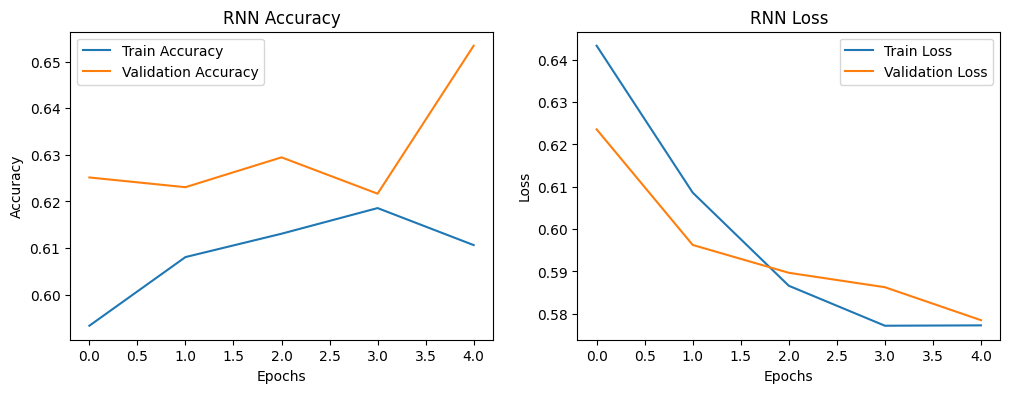

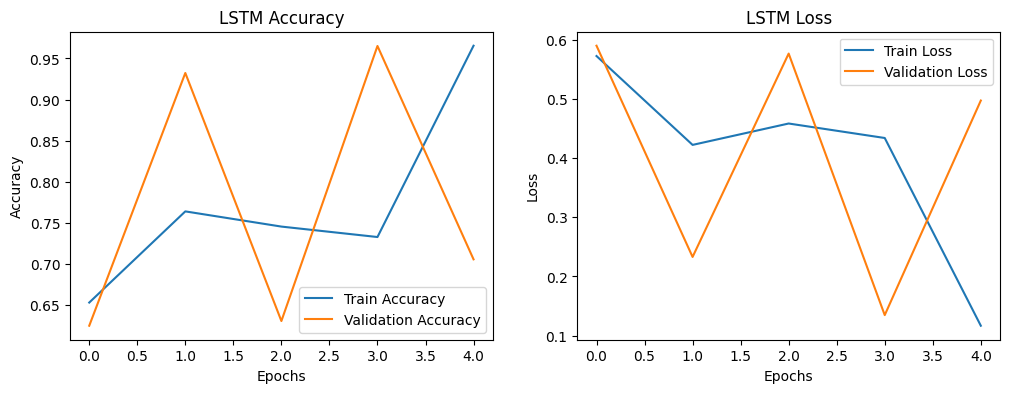

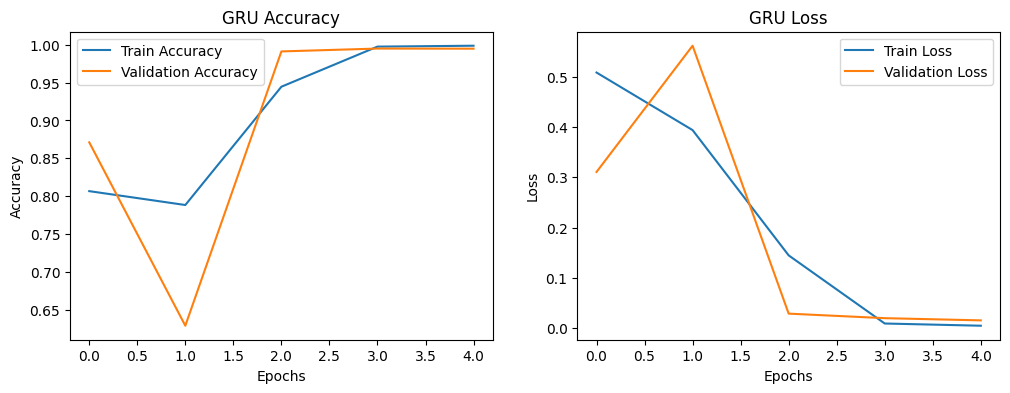

In [13]:
# Plotting the training history for each model
plot_history(rnn_history, 'RNN')
plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')



In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Function to create RNN model
def create_rnn_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(SimpleRNN(units=64, dropout=0.3))  # Dropout added
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create LSTM model with dropout
def create_lstm_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3))  # Dropout + recurrent_dropout
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create GRU model with dropout
def create_gru_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=64, dropout=0.3, recurrent_dropout=0.3))  # Dropout + recurrent_dropout
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create Bidirectional LSTM model
def create_bi_lstm_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(Bidirectional(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create Bidirectional GRU model
def create_bi_gru_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [16]:
# Parameters
max_words = 10000
embedding_dim = 64
input_length = 100
epochs = 10
batch_size = 64

# Callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [ ]:
# Train RNN model
rnn_model = create_rnn_model(max_words, embedding_dim, input_length)
print("Training RNN model...")
rnn_history = rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.2, callbacks=[early_stop])
print(rnn_model.summary())

# Train LSTM model
lstm_model = create_lstm_model(max_words, embedding_dim, input_length)
print("Training LSTM model...")
lstm_history = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.2, callbacks=[early_stop])
print(lstm_model.summary())

# Train GRU model
gru_model = create_gru_model(max_words, embedding_dim, input_length)
print("Training GRU model...")
gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.2, callbacks=[early_stop])
print(gru_model.summary())

# Train Bidirectional LSTM model
bi_lstm_model = create_bi_lstm_model(max_words, embedding_dim, input_length)
print("Training Bidirectional LSTM model...")
bi_lstm_history = bi_lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                    validation_split=0.2, callbacks=[early_stop])
print(bi_lstm_model.summary())

# Train Bidirectional GRU model
bi_gru_model = create_bi_gru_model(max_words, embedding_dim, input_length)
print("Training Bidirectional GRU model...")
bi_gru_history = bi_gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                validation_split=0.2, callbacks=[early_stop])
print(bi_gru_model.summary())


c:\Users\Delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training RNN model...
Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 62s 131ms/step - accuracy: 0.6015 - loss: 0.6299 - val_accuracy: 0.9062 - val_loss: 0.2958
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 69s 153ms/step - accuracy: 0.6466 - loss: 0.6083 - val_accuracy: 0.5944 - val_loss: 0.6111
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 162ms/step - accuracy: 0.6061 - loss: 0.6010 - val_accuracy: 0.5734 - val_loss: 0.6026


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 500, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,944,965 (7.42 MB)

 Trainable params: 648,321 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,296,644 (4.95 MB)

None
Training LSTM model...
Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 426s 927ms/step - accuracy: 0.6533 - loss: 0.5795 - val_accuracy: 0.9020 - val_loss: 0.2767
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.8190 - loss: 0.3988 - val_accuracy: 0.9187 - val_loss: 0.2557
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 479s 1s/step - accuracy: 0.9155 - loss: 0.2733 - val_accuracy: 0.9371 - val_loss: 0.2158
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 486s 1s/step - accuracy: 0.9255 - loss: 0.2417 - val_accuracy: 0.9574 - val_loss: 0.1501
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.9467 - loss: 0.1628 - val_accuracy: 0.9685 - val_loss: 0.0993
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 449s 999ms/step - accuracy: 0.9685 - loss: 0.0930 - val_accuracy: 0.9776 - val_loss: 0.0761
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 353s 786ms/step - accuracy: 0.9826 - loss: 0.0546 - val_accuracy: 0.9802 - val_loss: 0.0584
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 354s 789ms/step - ac

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 500, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,019,269 (7.70 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,180 (5.14 MB)

None
Training GRU model...
Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 281s 592ms/step - accuracy: 0.6640 - loss: 0.5701 - val_accuracy: 0.9301 - val_loss: 0.2292
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 278s 617ms/step - accuracy: 0.8271 - loss: 0.4210 - val_accuracy: 0.9581 - val_loss: 0.1501
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 305s 680ms/step - accuracy: 0.9563 - loss: 0.1489 - val_accuracy: 0.9669 - val_loss: 0.1137
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 311s 692ms/step - accuracy: 0.9593 - loss: 0.1374 - val_accuracy: 0.9592 - val_loss: 0.1222
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 314s 699ms/step - accuracy: 0.9704 - loss: 0.0994 - val_accuracy: 0.9545 - val_loss: 0.1528


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 500, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,995,077 (7.61 MB)

 Trainable params: 665,025 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,330,052 (5.07 MB)

None
Training Bidirectional LSTM model...
Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 1149s 3s/step - accuracy: 0.8789 - loss: 0.2703 - val_accuracy: 0.9900 - val_loss: 0.0296
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 1084s 2s/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9910 - val_loss: 0.0251
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 1213s 3s/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9929 - val_loss: 0.0253
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 1166s 3s/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9932 - val_loss: 0.0225
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 1029s 2s/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9923 - val_loss: 0.0246
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 9847s 22s/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9922 - val_loss: 0.0271


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 500, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,118,533 (8.08 MB)

 Trainable params: 706,177 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,412,356 (5.39 MB)

None
Training Bidirectional GRU model...
Epoch 1/10
415/449 ━━━━━━━━━━━━━━━━━━━━ 1:26 3s/step - accuracy: 0.8442 - loss: 0.2989